In [32]:
#В данном ноутбуке проведем разведывательный анализ данных для выбранного датасета abalone.csv.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [144]:
df = pd.read_csv('abalone.csv')
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,NaN,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4078 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4078 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4127 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [146]:
df.shape

(4177, 9)

In [147]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4078.000000,4177.000000,4078.000000,4177.000000,4177.000000,4127.000000,4177.000000
mean,0.523992,0.407840,0.139516,0.827306,0.359367,0.180594,0.239072,9.933684
std,0.120093,0.099286,0.041827,0.490348,0.221963,0.109614,0.138942,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.440500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.798500,0.336000,0.171000,0.235000,9.000000
75%,0.615000,0.480000,0.165000,1.150875,0.502000,0.253000,0.328250,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [148]:
df.describe(include='object')

,Sex
count,4177
unique,4
top,M
freq,1447


In [149]:
df.duplicated().sum().sum() # =0 => дубликатов в датафрейме нет

0

In [150]:
df.Diameter.isna().sum()/len(df.Diameter) * 100 #т.к. пропусков менее 5% - заполним недостающие значения медианным; аналогично для параметра "Whole weight" и "Shell weight"

2.3701220971989465

In [151]:
median_Diameter = df['Diameter'].median()
df['Diameter'].fillna(median_Diameter, inplace=True)
median_Wh_weight = df['Whole weight'].median()
df['Whole weight'].fillna(median_Wh_weight, inplace=True)
median_Sh_weight = df['Shell weight'].median()
df['Shell weight'].fillna(median_Sh_weight, inplace=True)

In [152]:
#Для дальнейшего применения машинного обучения 0 в датасете быть не должно, проверим это:
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

array([[<AxesSubplot:title={'center':'Length'}>,
        <AxesSubplot:title={'center':'Diameter'}>,
        <AxesSubplot:title={'center':'Height'}>],
       [<AxesSubplot:title={'center':'Whole weight'}>,
        <AxesSubplot:title={'center':'Shucked weight'}>,
        <AxesSubplot:title={'center':'Viscera weight'}>],
       [<AxesSubplot:title={'center':'Shell weight'}>,
        <AxesSubplot:title={'center':'Rings'}>, <AxesSubplot:>]],
      dtype=object)

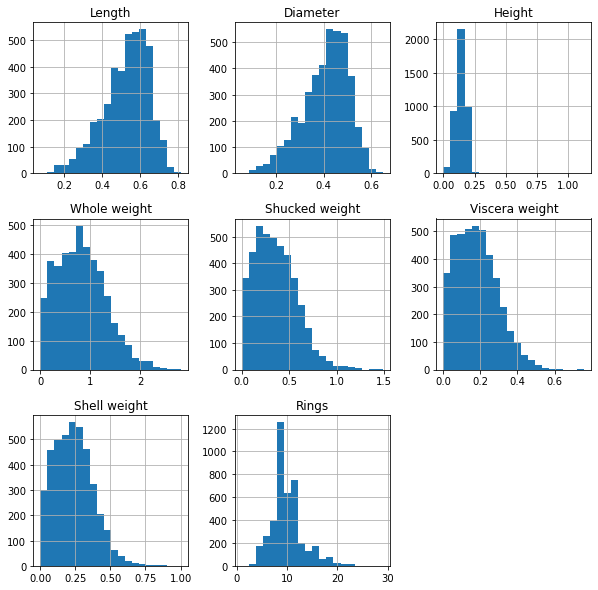

In [153]:
#Посмотрим распределения всех рассматриваемых парметров в датасете:
df.hist(bins = 20, figsize = (10,10))

In [154]:
#Рассмотрим связь целевой переменной с другими признаками:

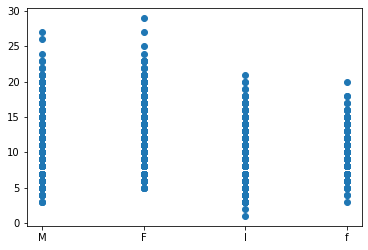

In [155]:
plt.figure(figsize=(6,4))
plt.scatter(df.Sex, df.Rings)

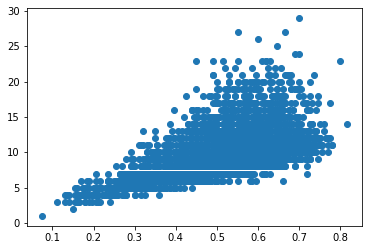

In [44]:
plt.figure(figsize=(6,4))
plt.scatter(df.Length, df.Rings)

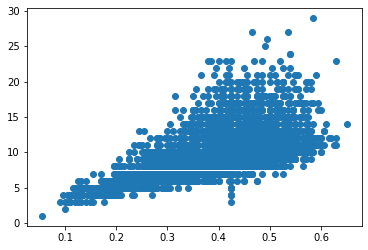

In [45]:
plt.figure(figsize=(6,4))
plt.scatter(df.Diameter, df.Rings)

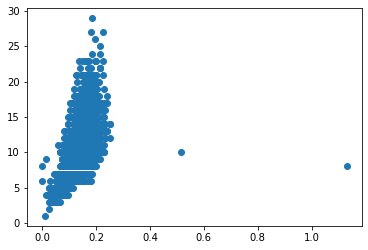

In [46]:
plt.figure(figsize=(6,4))
plt.scatter(df.Height, df.Rings)

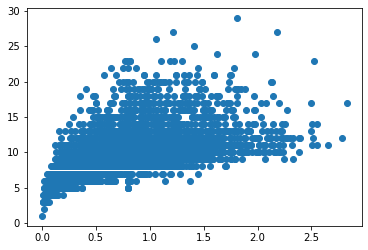

In [47]:
plt.figure(figsize=(6,4))
plt.scatter(df['Whole weight'], df.Rings)

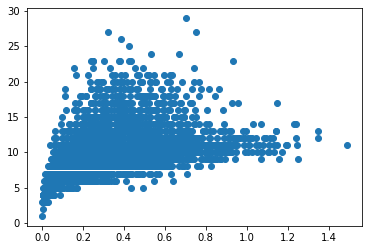

In [48]:
plt.figure(figsize=(6,4))
plt.scatter(df['Shucked weight'], df.Rings)

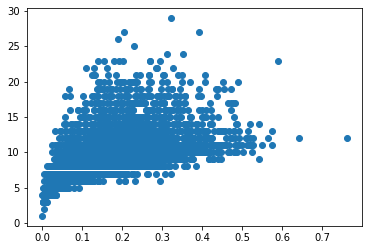

In [49]:
plt.figure(figsize=(6,4))
plt.scatter(df['Viscera weight'], df.Rings) 

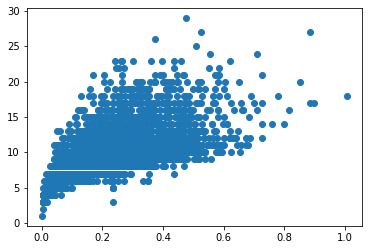

In [50]:
plt.figure(figsize=(6,4))
plt.scatter(df['Shell weight'], df.Rings)

<AxesSubplot:>

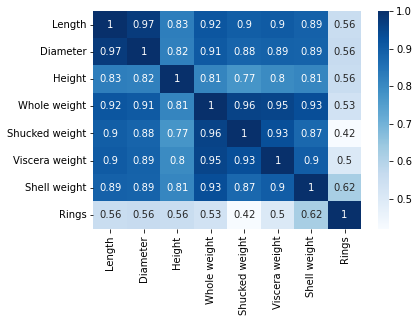

In [56]:
#Построим матрицу корреляций. Начнем с корреляции Пирсона:
corr = df.corr()
sns.heatmap(corr, cmap = 'Blues', annot = True)

<AxesSubplot:>

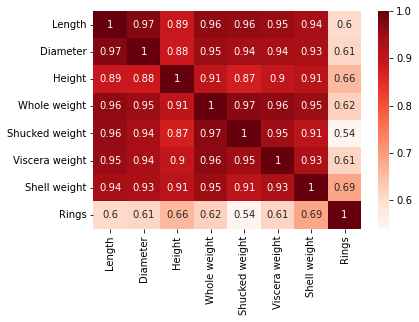

In [57]:
#Так как переменная Sex является номинальной, но не является порядковой, невозможно применить корреляцию Спирмена.
#Также не получится использовать статистику  𝜒2, так как в датасете только одна номинальная переменная.

(array([  9.,  11.,  26.,  79., 164., 538., 217., 112.,  87.,  50.,  73.,
         23.,  17.,  15.,  11.,   9.,   3.,   1.,   0.,   2.]),
 array([ 3. ,  4.2,  5.4,  6.6,  7.8,  9. , 10.2, 11.4, 12.6, 13.8, 15. ,
        16.2, 17.4, 18.6, 19.8, 21. , 22.2, 23.4, 24.6, 25.8, 27. ]),
 <BarContainer object of 20 artists>)

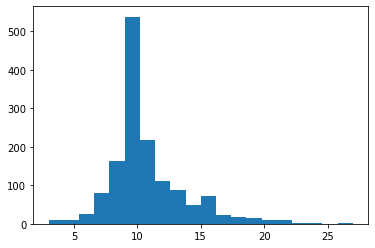

In [156]:
# Так как "ANOVA основан на предположении, что переменная, которая анализируется, является нормально распределенной в каждой группе, и что дисперсия внутри групп равномерна", проверим распределение целевой переменной в зависимости от значения переменной Sex:
#df.Rings[('Sex' == 'M')].hist()
df_M = df[df.Sex == 'M']
df_I = df[df.Sex == 'I']
df_F = df[df.Sex == 'F']
plt.hist(df_M.Rings, bins = 20)

In [157]:
df.Sex.value_counts()

M    1447
I    1276
F    1259
f     195
Name: Sex, dtype: int64

In [158]:
#Заметим, что в описании к датасету указано, что пола всего 3 => делаем вывод, что 'f' вместо 'F' -- опечатка. Исправим это:
df['Sex'] = df['Sex'].replace('f', 'F')

In [172]:
#Проверим значения в столбце Sex теперь:
df.Sex.value_counts()

F    1454
M    1447
I    1276
Name: Sex, dtype: int64

(array([  1.,   1.,  11.,  49.,  95., 207., 258., 259., 164.,  85.,  59.,
         20.,  24.,  13.,   7.,   6.,   7.,   5.,   2.,   3.]),
 array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
        14., 15., 16., 17., 18., 19., 20., 21.]),
 <BarContainer object of 20 artists>)

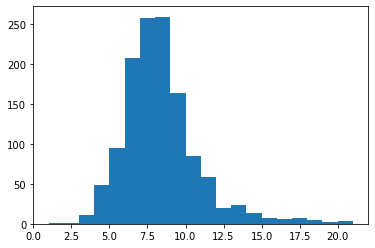

In [78]:
plt.hist(df_I.Rings, bins = 20)

(array([ 20.,  42., 118., 231., 236., 316.,  86.,  49.,  40.,  30.,  44.,
         15.,  12.,   7.,   3.,   7.,   1.,   0.,   1.,   1.]),
 array([ 5. ,  6.2,  7.4,  8.6,  9.8, 11. , 12.2, 13.4, 14.6, 15.8, 17. ,
        18.2, 19.4, 20.6, 21.8, 23. , 24.2, 25.4, 26.6, 27.8, 29. ]),
 <BarContainer object of 20 artists>)

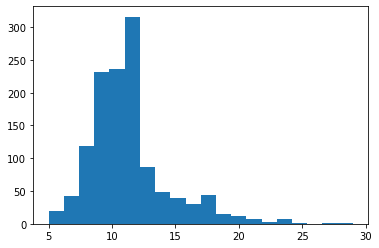

In [71]:
plt.hist(df_F.Rings, bins = 20)

(array([ 1.,  2.,  5., 10., 12., 27.,  0., 34., 35., 18., 12.,  6., 14.,
         0.,  9.,  5.,  2.,  2.,  0.,  1.]),
 array([ 3.  ,  3.85,  4.7 ,  5.55,  6.4 ,  7.25,  8.1 ,  8.95,  9.8 ,
        10.65, 11.5 , 12.35, 13.2 , 14.05, 14.9 , 15.75, 16.6 , 17.45,
        18.3 , 19.15, 20.  ]),
 <BarContainer object of 20 artists>)

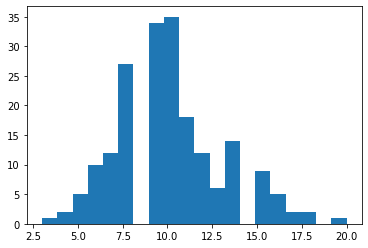

In [72]:
plt.hist(df_f.Rings, bins = 20)

In [ ]:
#Замечаем, что распределения похожи на нормальные => предпосылка #1 для использования ANOVA выполнена.

In [186]:
#Проверим наличие предпосылки #2: "дисперсия внутри групп равномерна".
#Рассмотрим дисперсии внутри категорий пола:
from statistics import variance

print(f'Дисперсия в группе мужского пола: {variance(df_M.Rings)}')
print(f'Дисперсия в группе infant: {variance(df_I.Rings)}')
print(f'Дисперсия в группе женского пола: {variance(df_F.Rings)}')

Дисперсия в группе мужского пола: 9.204405356243328
Дисперсия в группе infant: 6.258963058577663
Дисперсия в группе женского пола: 9.804413627288925


In [ ]:
#Замечаем, что дисперсии в группах приблизительно равны.

In [60]:
#Так как обе предпосылки выполнены, перейдем к ANOVA:
from scipy.stats import f_oneway
CategoryGroupLists = df.groupby('Sex')['Rings'].apply(list)

AnovaResults = f_oneway(*CategoryGroupLists)

print('P-Value for Anova is: ', AnovaResults[1])

if AnovaResults[1] >= 0.05:
    print('Features are NOT correlated')
else:
    print('Features are correlated')

P-Value for Anova is:  1.8545900446585218e-185
Features are correlated


(array([  1.,   0.,   0.,   1.,   0.,   0.,   0.,  15.,   0.,   0.,  57.,
          0.,   0.,   0., 115.,   0.,   0., 259.,   0.,   0.,   0., 391.,
          0.,   0.,   0., 568.,   0.,   0., 689.,   0.,   0.,   0., 634.,
          0.,   0., 487.,   0.,   0.,   0., 267.,   0.,   0., 203.,   0.,
          0.,   0., 126.,   0.,   0., 103.,   0.,   0.,   0.,  67.,   0.,
          0.,   0.,  58.,   0.,   0.,  42.,   0.,   0.,   0.,  32.,   0.,
          0.,  26.,   0.,   0.,   0.,  14.,   0.,   0.,   6.,   0.,   0.,
          0.,   9.,   0.,   0.,   0.,   2.,   0.,   0.,   1.,   0.,   0.,
          0.,   1.,   0.,   0.,   2.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.]),
 array([ 1.  ,  1.28,  1.56,  1.84,  2.12,  2.4 ,  2.68,  2.96,  3.24,
         3.52,  3.8 ,  4.08,  4.36,  4.64,  4.92,  5.2 ,  5.48,  5.76,
         6.04,  6.32,  6.6 ,  6.88,  7.16,  7.44,  7.72,  8.  ,  8.28,
         8.56,  8.84,  9.12,  9.4 ,  9.68,  9.96, 10.24, 10.52, 10.8 ,
        11.08, 11.36, 11.64, 11.92

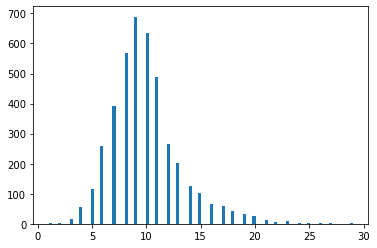

In [83]:
#Ещё раз посмотрим на распределение целевой переменной:
plt.hist(df.Rings, bins = 100)

In [ ]:
#Заметим, что распределение целевой переменной напоминает нормальное с небольшой правосторонней асимметрией. Из-за этого могут возникнуть проблемы с обучением модели для предсказания малых и (особенно) высоких значений целевой переменной.

In [84]:
#Увеличим количество строк в датасете до 10^6:
df_big = df.copy()

for i in range(240):
  df_big = pd.concat([df_big, df])

df_big.to_csv("abalone_big.csv", index=False)

In [85]:
df_big.shape, df.shape

((1006657, 9), (4177, 9))

In [86]:
!pip install polars

import polars as pl

print(pl.__version__)

0.18.7


In [ ]:
#Загрузим данные:

In [107]:
%%time
#Pandas

df_pl = pl.read_csv("abalone_big.csv")

CPU times: user 441 ms, sys: 114 ms, total: 555 ms
Wall time: 92.3 ms


In [141]:
%%time
#Polars

df_pd = pd.read_csv("abalone_big.csv")

CPU times: user 374 ms, sys: 94.9 ms, total: 469 ms
Wall time: 562 ms


In [105]:
#Замечаем, что Pandas с загрузкой данных справляется быстрее, чем Polars.

In [ ]:
#Применим фильтрацию к датасетам таким образом, чтобы в них остались только представители мужского пола, с длиной больше медианной и с весом раковины больше медианного.

In [142]:
%%time
# Pandas

df2 = df_pd[(df_pd.Sex == 'M') & (df_pd['Shell weight'] > df_pd['Shell weight'].median()) & (df_pd['Length'] > df_pd['Length'].median())]
df2

CPU times: user 105 ms, sys: 27.5 ms, total: 132 ms
Wall time: 138 ms


,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
27,M,0.590,0.445,0.140,0.9310,0.3560,0.2340,0.2800,12
28,M,0.605,0.475,0.180,0.9365,0.3940,0.2190,0.2950,15
30,M,0.580,0.470,0.165,0.9975,0.3935,0.2420,0.3300,10
70,M,0.555,0.425,0.130,0.7665,0.2640,0.1680,0.2750,13
73,M,0.570,0.480,0.175,1.1850,0.4740,0.2610,0.3800,11
...,...,...,...,...,...,...,...,...,...
1006628,M,0.770,0.605,0.175,2.0505,0.8005,0.5260,0.3550,11
1006650,M,0.550,0.430,0.130,0.8395,0.3155,0.1955,0.2405,10
1006653,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
1006654,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9


In [113]:
%%time
#Polars

df_pl.filter((pl.col('Sex') == 'M') & (pl.col('Shell weight') > pl.col('Shell weight').median()) & (pl.col('Length') > pl.col('Length').median()))

CPU times: user 170 ms, sys: 31.1 ms, total: 201 ms
Wall time: 59.6 ms


Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
str,f64,f64,f64,f64,f64,f64,f64,i64
"""M""",0.59,0.445,0.14,0.931,0.356,0.234,0.28,12
"""M""",0.605,0.475,0.18,0.9365,0.394,0.219,0.295,15
"""M""",0.58,0.47,0.165,0.9975,0.3935,0.242,0.33,10
"""M""",0.555,0.425,0.13,0.7665,0.264,0.168,0.275,13
"""M""",0.57,0.48,0.175,1.185,0.474,0.261,0.38,11
"""M""",0.595,0.475,0.14,0.944,0.3625,0.189,0.315,9
"""M""",0.62,0.51,0.175,1.615,0.5105,0.192,0.675,12
"""M""",0.595,0.475,0.16,1.3175,0.408,0.234,0.58,21
"""M""",0.58,0.45,0.14,1.013,0.38,0.216,0.36,14


In [ ]:
#С фильтрацей оперативнее справляется Polars, чем Pandas.

In [112]:
#Агрегируем данные в датасетах по полу и количеству колец, выведя средние значения длины и диаметра, а также максимальное значение высоты.

In [143]:
%%time
# Pandas

df_pd.groupby(['Sex', 'Rings']).agg({'Length': 'mean', 'Diameter': 'mean', 'Height': 'max'})

CPU times: user 94.6 ms, sys: 16.4 ms, total: 111 ms
Wall time: 123 ms


Length  Diameter  Height
Sex Rings                            
F   5      0.323750  0.241250   0.090
    6      0.462813  0.349062   0.180
    7      0.465952  0.364756   0.180
    8      0.538347  0.418103   1.130
    9      0.575303  0.447775   0.215
...             ...       ...     ...
f   15     0.555556  0.434444   0.185
    16     0.575000  0.449000   0.230
    17     0.692500  0.540000   0.230
    18     0.660000  0.527500   0.190
    20     0.630000  0.515000   0.165

[85 rows x 3 columns]

In [132]:
%%time
#Polars

q = (
    df_pl
    .lazy()
    .groupby(["Rings","Sex"])
    .agg(
        [
            pl.col('Length').mean(),
            pl.col('Diameter').mean(),
            pl.col('Height').max()
        ]
    )
)

CPU times: user 888 µs, sys: 7.36 ms, total: 8.25 ms
Wall time: 19.9 ms


In [134]:
%%time
q.collect()

CPU times: user 140 ms, sys: 17.5 ms, total: 157 ms
Wall time: 38.9 ms


Rings,Sex,Length,Diameter,Height
i64,str,f64,f64,f64
15,"""M""",0.577447,0.457872,0.23
7,"""M""",0.448354,0.343896,0.17
11,"""M""",0.604539,0.475488,0.23
11,"""F""",0.614041,0.482474,0.225
15,"""F""",0.582375,0.462237,0.225
5,"""I""",0.285474,0.21022,0.115
7,"""F""",0.465952,0.364756,0.18
10,"""f""",0.582714,0.46125,0.21
6,"""M""",0.380577,0.282,0.155


In [ ]:
#Замечаем, что Polars снова справился быстрее, чем Pandas.